<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/SummaryStatsbyHand_Augustine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 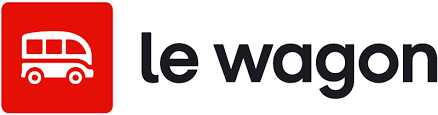


# Summary stats by hand

Run this cell to import the necessary packages and authenticate to google cloud so you can import the dataset.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` LIMIT 10000"
id = "data-analytics-bootcamp-363212"
orders_df = pd.read_gbq(query, project_id = id)

In [ ]:
# check your orders_df

In [ ]:
orders_df.head()

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2021-03-30,823167,33056,FRANCE,36,59,156.59
1,2021-11-06,1035041,17276,FRANCE,48,41,141.38
2,2019-03-25,66507,12328,FRANCE,03,41,103.57
3,2020-08-13,545258,8339,FRANCE,89,40,140.44
4,2021-01-12,730355,10476,FRANCE,39,34,208.83


## Write functions for the fundamental metrics in statistics

In the following cells, you will code functions for the fundamental metrics in statistics:

    - Mean
    - Median
    - Mode
    - Standard Deviation (and Variance)
    
Don't use any of the inbuilt functions that already do this! Use the lecture slides for the formulas for each of these metrics.

After you have written them, you should test them by using the inbuilt functions


### Mean

In [ ]:
orders_df.groupby('country').count()

,date_date,orders_id,customers_id,department,total_quantity,total_turnover
country,,,,,,
FRANCE,10000,10000,10000,9990,10000,10000


In [ ]:
# Write a function def mean_value that calculates the mean value of a column
def mean_value(column):
  return column.sum() / column.count() # you can also use len(column)

In [ ]:
# Test it against the inbuilt mean function on the total_turnover column and compare both values to output True or False
mean_value(orders_df["total_turnover"]) == orders_df["total_turnover"].mean()

True

### Median

In [ ]:
# Write a function def median_value that calculates the median value of a column
def median_value(column):
  column = column.sort_values().reset_index(drop = True)
  if len(column) % 2 == 0:
    median = (column[len(column)//2 - 1] + column[len(column)//2]) / 2
  else:
    median = column[len(column) // 2]
  return median


In [ ]:
# Test it against the inbuilt median function on the total_turnover column and compare both values to output True or False
median_value(orders_df["total_turnover"]) == orders_df["total_turnover"].median()

True

In [ ]:
# Let's also test it for an odd number of rows (for example by taking the same column except the last element)
median_value(orders_df["total_turnover"].iloc[:-1]) == orders_df["total_turnover"].iloc[:-1].median()

True

### Mode

In [ ]:
# Write a function def modal_value that calculates the modal value of a column
def modal_value(column):
    counts = {}
    for value in column:
        if value not in counts:
            counts[value] = 1
        else:
            counts[value] += 1
    max_count = max(counts.values())
    modes = [value for value, count in counts.items() if count == max_count]
    return modes

In [ ]:
# Test it against the inbuilt mode function on the total_turnover column and compare both values to output True or False
modal_value(orders_df["total_turnover"]) == orders_df["total_turnover"].mode()

0    True
Name: total_turnover, dtype: bool

### Variance

In [ ]:
# Write a function def variance_value that calculates the variance of a column. Reuse the mean value function you made earlier.
def variance_value(column):
    mean = mean_value(column)
    differences = (column - mean) ** 2
    variance = sum(differences) / (len(column))

    return variance

In [ ]:
# Test it against the inbuilt variance function on the total_turnover column and compare both values to output True or False
variance_value(orders_df["total_turnover"]) == orders_df["total_turnover"].var()

False

In [ ]:
orders_df["total_turnover"].var()

11187.105015728197

In [ ]:
variance_value(orders_df["total_turnover"])

11185.98630522666

### Did you do everything right but the values are not the same?

Look up how pandas calculates the variance (in the documentation) and also read this [stackexchange](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation/3934#3934) thread (like a true programmer).

In [ ]:
# Try testing your function again against the inbuilt variance function, this time changing the necessary argument to remove the normalization
# Hint - try np.allclose() to account for the very small differences that might appear
np.allclose(variance_value(orders_df["total_turnover"]), orders_df["total_turnover"].var(ddof = 0))

True

### Standard deviation

In [ ]:
# Now write a function to calculate the standard deviation of a column. Reuse the variance function you made earlier.
def standard_deviation_value(column):
  return variance_value(column) ** 0.5

In [ ]:
# Test your function against the inbuilt pandas standard deviation function (remember the caveat from the earlier test) and compare both values to output True or False
np.allclose(standard_deviation_value(orders_df["total_turnover"]), orders_df["total_turnover"].std(ddof = 0))

True

## Summarising the learnings

As you might have noticed, the most common metrics in statistics do not have incredibly complex underlyings, but they do provide very useful insights into our data. Before you resort to more complex machine learning methods, think about what stories you can tell with just these simple metrics.


Note: you might have also noticed how useful it is to repurpose code you wrote earlier. This is one of programmings's mantras - DRY (Don't Repeat Yourself). For a fun and insightful short read, try [The Zen of Python](https://peps.python.org/pep-0020/)